In [1]:
!pip install -q scikit-learn pandas matplotlib seaborn


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import classification_report, roc_auc_score, roc_curve, confusion_matrix


In [4]:
# If using Kaggle, first upload the CSV file
df = pd.read_csv('/content/heart_cleveland_upload.csv')  # Replace path with your file if different
df.head()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
0,69,1,0,160,234,1,2,131,0,0.1,1,1,0,0
1,69,0,0,140,239,0,0,151,0,1.8,0,2,0,0
2,66,0,0,150,226,0,0,114,0,2.6,2,0,0,0
3,65,1,0,138,282,1,2,174,0,1.4,1,1,0,1
4,64,1,0,110,211,0,2,144,1,1.8,1,0,0,0


In [6]:
print(df.columns)


Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'condition'],
      dtype='object')


In [7]:
df.columns = df.columns.str.strip()


In [8]:
print(df.columns)


Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'condition'],
      dtype='object')


In [9]:
X = df.drop('condition', axis=1)
y = df['condition']


In [10]:
print(df['condition'].value_counts())


condition
0    160
1    137
Name: count, dtype: int64


In [11]:
X = df.drop('condition', axis=1)
y = df['condition']


In [12]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


In [13]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [14]:
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV


In [15]:
svm_model = SVC(probability=True)

svm_params = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf'],
    'gamma': ['scale', 'auto']
}

grid_svm = GridSearchCV(svm_model, svm_params, cv=5, scoring='accuracy')
grid_svm.fit(X_train, y_train)

best_svm = grid_svm.best_estimator_
print("Best SVM Parameters:", grid_svm.best_params_)


Best SVM Parameters: {'C': 0.1, 'gamma': 'scale', 'kernel': 'linear'}


In [16]:
rf_model = RandomForestClassifier(random_state=42)

rf_params = {
    'n_estimators': [100, 200],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5]
}

grid_rf = GridSearchCV(rf_model, rf_params, cv=5, scoring='accuracy')
grid_rf.fit(X_train, y_train)

best_rf = grid_rf.best_estimator_
print("Best RF Parameters:", grid_rf.best_params_)


Best RF Parameters: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 100}


In [17]:
gb_model = GradientBoostingClassifier(random_state=42)

gb_params = {
    'n_estimators': [100, 200],
    'learning_rate': [0.05, 0.1],
    'max_depth': [3, 4]
}

grid_gb = GridSearchCV(gb_model, gb_params, cv=5, scoring='accuracy')
grid_gb.fit(X_train, y_train)

best_gb = grid_gb.best_estimator_
print("Best GBM Parameters:", grid_gb.best_params_)


Best GBM Parameters: {'learning_rate': 0.05, 'max_depth': 4, 'n_estimators': 100}


In [18]:
from sklearn.metrics import classification_report, roc_auc_score, precision_score, recall_score, f1_score


In [19]:
def evaluate_model(name, model):
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1]

    print(f"--- {name} ---")
    print(classification_report(y_test, y_pred))
    auc = roc_auc_score(y_test, y_prob)

    return {
        'Model': name,
        'Accuracy': model.score(X_test, y_test),
        'Precision': precision_score(y_test, y_pred),
        'Recall': recall_score(y_test, y_pred),
        'F1-Score': f1_score(y_test, y_pred),
        'AUC-ROC': auc
    }


In [20]:
results = []
results.append(evaluate_model("SVM", best_svm))
results.append(evaluate_model("Random Forest", best_rf))
results.append(evaluate_model("Gradient Boosting", best_gb))


--- SVM ---
              precision    recall  f1-score   support

           0       0.84      1.00      0.91        32
           1       1.00      0.79      0.88        28

    accuracy                           0.90        60
   macro avg       0.92      0.89      0.90        60
weighted avg       0.92      0.90      0.90        60

--- Random Forest ---
              precision    recall  f1-score   support

           0       0.84      0.97      0.90        32
           1       0.96      0.79      0.86        28

    accuracy                           0.88        60
   macro avg       0.90      0.88      0.88        60
weighted avg       0.89      0.88      0.88        60

--- Gradient Boosting ---
              precision    recall  f1-score   support

           0       0.79      0.94      0.86        32
           1       0.91      0.71      0.80        28

    accuracy                           0.83        60
   macro avg       0.85      0.83      0.83        60
weighted avg  

In [21]:
summary_df = pd.DataFrame(results)
summary_df


,Model,Accuracy,Precision,Recall,F1-Score,AUC-ROC
0,SVM,0.900000,1.000000,0.785714,0.880000,0.938616
1,Random Forest,0.883333,0.956522,0.785714,0.862745,0.944754
2,Gradient Boosting,0.833333,0.909091,0.714286,0.800000,0.921875


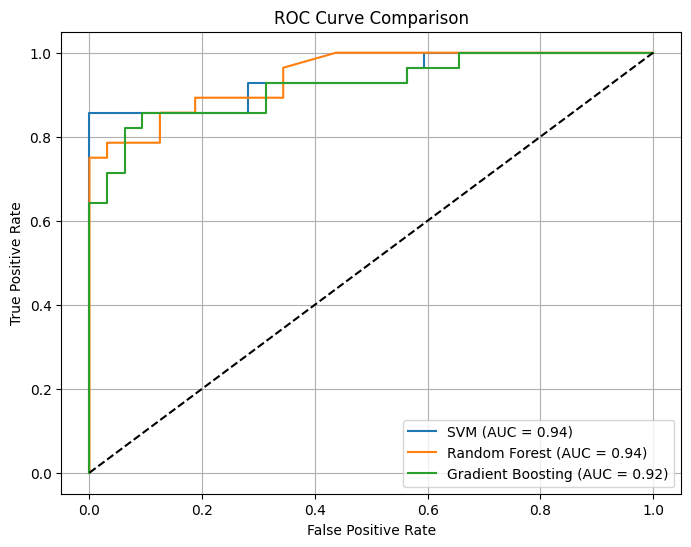

In [22]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

def plot_roc(model, name):
    y_prob = model.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc_score(y_test, y_prob):.2f})')

plt.figure(figsize=(8, 6))
plot_roc(best_svm, "SVM")
plot_roc(best_rf, "Random Forest")
plot_roc(best_gb, "Gradient Boosting")

plt.plot([0, 1], [0, 1], 'k--')
plt.title('ROC Curve Comparison')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()


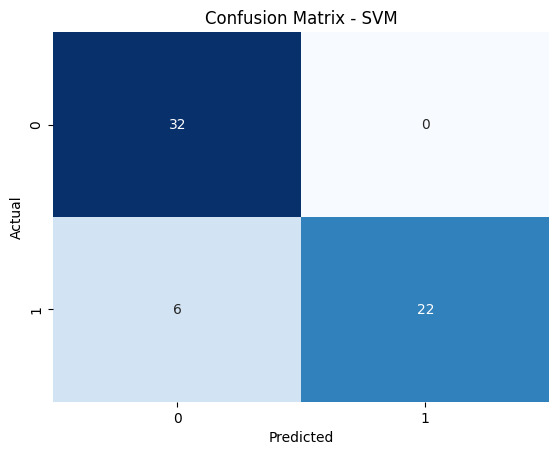

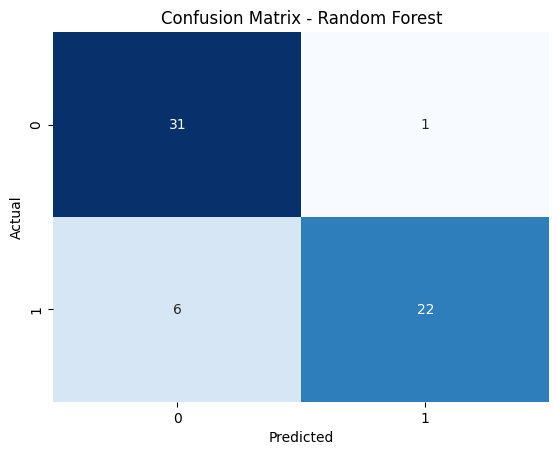

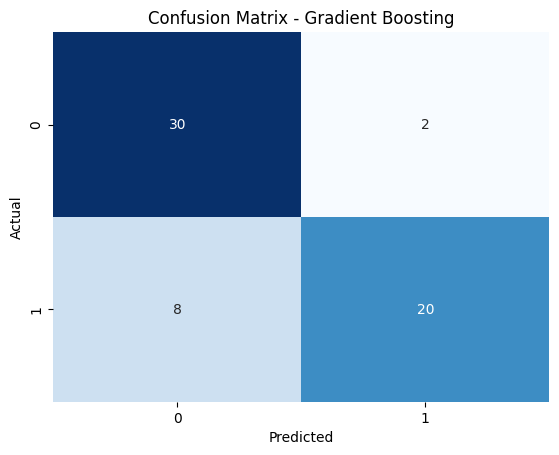

In [23]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

def plot_confusion(name, model):
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.title(f'Confusion Matrix - {name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

plot_confusion("SVM", best_svm)
plot_confusion("Random Forest", best_rf)
plot_confusion("Gradient Boosting", best_gb)
